The Project Repo URL: https://github.com/calledammar/Udacity-Project-01/tree/main

The Blog Post URL: https://github.com/calledammar/Udacity-Project-01/blob/main/BLOG_POST.md

I couldn't upload the data into GitHub because it was to large to be upladed, saying it should be less that 25MB..

However I used Stack Over Flow Survey data for 2024: you can download it via this link: https://survey.stackoverflow.co

# Developer Salary Prediction

This project aims to predict a developer's annual income using the Stack Overflow Developer Survey. The goal is to apply a data science process (CRISP-DM) to
build a model that can estimate a respondent’s `ConvertedCompYearly` (annual compensation) based on their survey responses. Accurate salary predictions can help developers benchmark compensation and understand how factors like experience, education, and technology usage influence pay.


## 1. Business Understanding

The primary objective of this project is to build a regression model that predicts a survey respondent’s annual salary. With insights from the Stack Overflow Developer Survey, we hope to answer questions such as:

* **Which factors most strongly influence salary?** For example, years of professional coding experience, education level, and technology stacks may all contribute.
* **How large is the salary gap across different developer populations?** Understanding salary distributions helps identify outliers and inequities.
* **Can we build a reliable model to estimate salaries for unknown cases?** A well-performing model can be used by developers to benchmark their compensation against peers.

We follow the CRISP-DM methodology, which structures a data science project into the following stages: business understanding, data understanding, data preparation, modeling, evaluation, and deployment. This notebook focuses on the first five steps, leaving deployment as a potential extension.


## 2. Data Understanding

In this section we explore the Stack Overflow survey data. The raw dataset includes responses from thousands of developers across the world, with hundreds of questions covering demographics, education, technology use, and compensation.

We start by loading the survey results and inspecting the structure of the dataset. We also examine missing values and initial statistics to get a sense of the data quality.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

try:
    df = pd.read_csv('survey_results_public.csv')
    print(f"Data loaded: {df.shape[0]} rows and {df.shape[1]} columns")
except FileNotFoundError:
    print("Survey data file not found. Please ensure 'survey_results_public.csv' is available in this directory.")
    df = pd.DataFrame()

if not df.empty:
    df.head()


Data loaded: 65437 rows and 114 columns


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


,MissingPercent
AINextMuch less integrated,98.245641
AINextLess integrated,96.401119
AINextNo change,80.900714
AINextMuch more integrated,79.464217
EmbeddedAdmired,74.428840
EmbeddedWantToWorkWith,73.103901
EmbeddedHaveWorkedWith,66.052845
ConvertedCompYearly,64.186928
AIToolNot interested in Using,62.690832
AINextMore integrated,62.669438


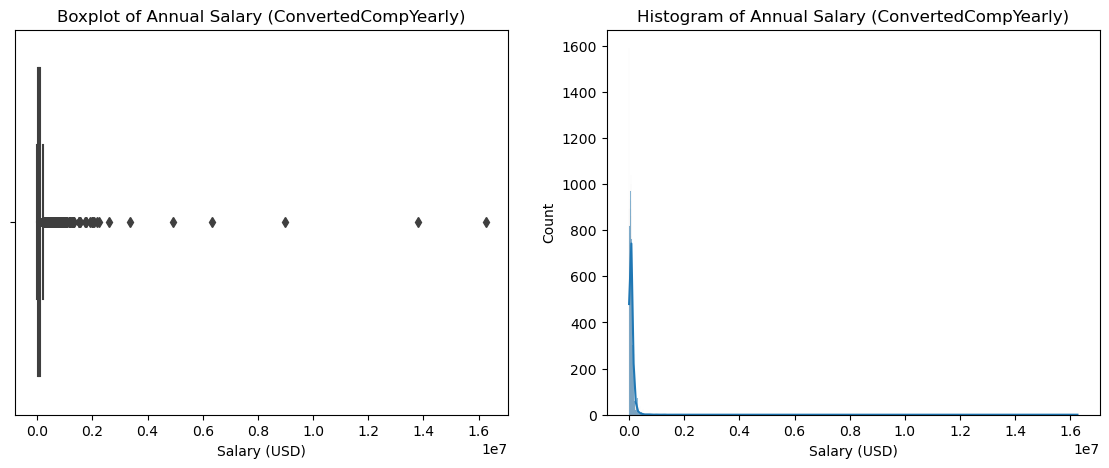

In [2]:
if not df.empty:
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    display(df[numeric_cols].describe())

    missing_percent = df.isna().mean().sort_values(ascending=False) * 100
    missing_df = missing_percent.to_frame(name='MissingPercent')
    display(missing_df.head(20))

    if 'ConvertedCompYearly' in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        sns.boxplot(x=df['ConvertedCompYearly'], ax=axes[0])
        axes[0].set_title('Boxplot of Annual Salary (ConvertedCompYearly)')
        axes[0].set_xlabel('Salary (USD)')

        sns.histplot(df['ConvertedCompYearly'].dropna(), kde=True, ax=axes[1])
        axes[1].set_title('Histogram of Annual Salary (ConvertedCompYearly)')
        axes[1].set_xlabel('Salary (USD)')

        plt.show()


## 3. Data Preparation

The raw data contains many columns that are either irrelevant to salary prediction or have a very high percentage of missing values. In this step we clean the data by:

* **Removing rows without salary information.** Our target variable is `ConvertedCompYearly`, so rows without this value cannot be used for modeling.
* **Dropping columns with too many missing values.** Columns with more than 30% missing data are discarded to simplify the analysis.
* **Converting ordinal categorical variables to numeric values.** For example, we convert `YearsCode` and `YearsCodePro` into numeric years of experience.
* **Handling multi-select columns.** Some survey questions allow respondents to select multiple values separated by semicolons. We can expand these into binary indicator columns. For simplicity, this notebook demonstrates the function but does not apply it to all multi-valued columns.
* **Removing extreme outliers.** We use the interquartile range (IQR) method to drop unreasonable salary values that could skew the model.

These steps produce a clean, numeric feature set suitable for machine learning models.


In [3]:
# Create a copy of the original DataFrame to avoid modifying the raw data
clean_df = df.copy()

if not clean_df.empty and 'ConvertedCompYearly' in clean_df.columns:
# Remove entries where salary (ConvertedCompYearly) is missing
    clean_df = clean_df[clean_df['ConvertedCompYearly'].notna()].reset_index(drop=True)
    print(f"Rows with salary: {len(clean_df)} (removed {len(df) - len(clean_df)} rows without salary)")

if not clean_df.empty:
# Define a threshold (30%) for dropping columns with too many missing values
    missing_threshold = 0.3
# Define a threshold (30%) for dropping columns with too many missing values
    cols_to_drop = [col for col in clean_df.columns if clean_df[col].isna().mean() > missing_threshold]
# Identify columns exceeding the missing value threshold
    print(f"Dropping {len(cols_to_drop)} columns with >30% missing values")
# Identify columns exceeding the missing value threshold
    clean_df.drop(columns=cols_to_drop, inplace=True)

if not clean_df.empty:
    import numpy as np
# Define helper function to convert years of experience strings to integers
    def years_to_int(x):
        x = str(x).strip()
        if x == 'More than 50 years':
            return 60
        if x == 'Less than 1 year':
            return 0
        try:
            return int(float(x))
        except:
            return np.nan

# Apply the conversion function to YearsCode and YearsCodePro columns
    for col in ['YearsCode', 'YearsCodePro']:
        if col in clean_df.columns:
            clean_df[col] = clean_df[col].apply(years_to_int)
    if 'YearsCode' in clean_df.columns and 'YearsCodePro' in clean_df.columns:
# Use YearsCodePro to fill missing YearsCode and vice versa
        clean_df['YearsCode'].fillna(clean_df['YearsCodePro'], inplace=True)
# Use YearsCodePro to fill missing YearsCode and vice versa
        clean_df['YearsCodePro'].fillna(clean_df['YearsCode'], inplace=True)

if not clean_df.empty:
    before_rows = len(clean_df)
# Drop rows with missing experience after conversion
    clean_df = clean_df.dropna(subset=['YearsCode', 'YearsCodePro'])
    print(f"Dropped {before_rows - len(clean_df)} rows due to missing experience")
# Convert years columns to integer type after filling missing values
    clean_df['YearsCode'] = clean_df['YearsCode'].astype(int)
# Convert years columns to integer type after filling missing values
    clean_df['YearsCodePro'] = clean_df['YearsCodePro'].astype(int)

if not clean_df.empty:
# Calculate the IQR bounds to identify outliers in salary
    Q1 = clean_df['ConvertedCompYearly'].quantile(0.25)
# Calculate the IQR bounds to identify outliers in salary
    Q3 = clean_df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Keep only rows within the calculated salary bounds to remove outliers
    clean_df = clean_df[(clean_df['ConvertedCompYearly'] >= lower_bound) & (clean_df['ConvertedCompYearly'] <= upper_bound)]
    print(f"Data after outlier removal: {clean_df.shape[0]} rows remaining")

clean_df.shape


Rows with salary: 23435 (removed 42002 rows without salary)
Dropping 56 columns with >30% missing values
Dropped 26 rows due to missing experience
Data after outlier removal: 22433 rows remaining


(22433, 58)

In [5]:
clean_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIThreat,AIEthics,TBranch,SurveyLength,SurveyEase,ConvertedCompYearly
0,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,3,1,Data scientist or machine learning specialist,100 to 499 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Integrated developer commun...,Pakistan,PKR\tPakistani rupee,2040000.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,C#;Rust;Scala,NaN,MongoDB;MySQL;SQLite,BigQuery;Cassandra;Databricks SQL;Elasticsearc...,Microsoft Azure;VMware,Angular;AngularJS;Express;FastAPI;Flask;jQuery...,Docker;Homebrew;Pip,Docker,Docker,IntelliJ IDEA;IPython;Jupyter Notebook/Jupyter...,NaN,NaN,MacOS;Windows,NaN,GitHub Discussions;Markdown File,NaN,NaN,Discord;Google Meet;Slack;Whatsapp;Zoom,NaN,NaN,ChatGPT;GitHub Copilot;Google Gemini;Visual St...,Stack Overflow;Stack Exchange,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat",Yes,Very favorable,No,Circulating misinformation or disinformation;M...,Yes,Too long,Easy,7322.0
1,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,NaN,12,6,Academic researcher,100 to 499 employees,I have little or no influence,Start a free trial;Ask developers I know/work ...,Is set up to be customized and needs to be eng...,NaN,Austria,EUR European Euro,28000.0,C;C++;Fortran;MATLAB;Python;SQL,C;C++;MATLAB;Python;SQL,C;C++;MATLAB;Python;SQL,PostgreSQL,PostgreSQL,NaN,NaN,NaN,NaN,NaN,Android Studio;IPython,Android Studio;IPython,Android Studio;IPython,Other Linux-based;Windows,Ubuntu;Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat","No, and I don't plan to",NaN,NaN,NaN,No,Appropriate in length,Neither easy nor difficult,30074.0
2,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,API document(s) and/or SDK document(s),15,6,Data scientist or machine learning specialist,20 to 99 employees,I have a great deal of influence,Ask developers I know/work with;Research compa...,Is ready-to-go but also customizable for growt...,APIs;Connected to an open source project,Turkey,EUR European Euro,85000.0,JavaScript;Julia;Python;SQL;TypeScript,Go;

## 4. Exploratory Questions and Answers

Before building predictive models, it's important to explore the cleaned data and answer business-oriented questions that provide context. Here we pose several questions and answer them using visualizations and summary statistics.


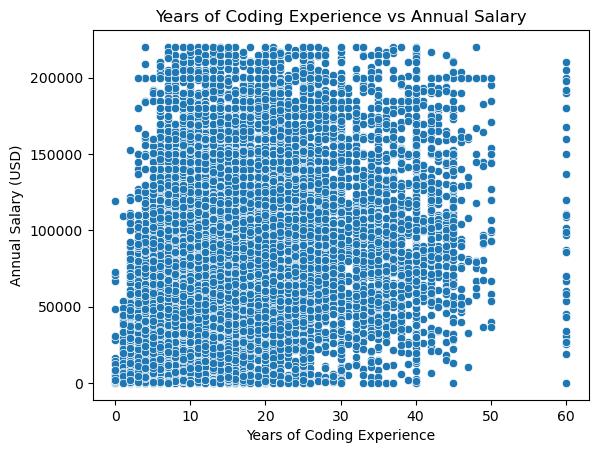

Correlation between coding experience and salary: 0.40


In [6]:
# Q1: How does the number of years a respondent has been coding relate to their salary?
if not clean_df.empty:
    # Scatter plot of years of experience vs salary
    sns.scatterplot(x=clean_df['YearsCode'], y=clean_df['ConvertedCompYearly'])
    plt.title('Years of Coding Experience vs Annual Salary')
    plt.xlabel('Years of Coding Experience')
    plt.ylabel('Annual Salary (USD)')
    plt.show()
    
    # Compute and display correlation coefficient
    corr = clean_df[['YearsCode', 'ConvertedCompYearly']].corr().iloc[0, 1]
    print(f'Correlation between coding experience and salary: {corr:.2f}')
else:
    print('Clean dataset is empty; cannot compute this analysis.')


EdLevel
Professional degree (JD, MD, Ph.D, Ed.D, etc.)            75184.0
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           65331.0
Bachelor’s degree (B.A., B.S., B.Eng., etc.)              64444.0
Associate degree (A.A., A.S., etc.)                       59073.0
Some college/university study without earning a degree    56925.0
Name: ConvertedCompYearly, dtype: float64

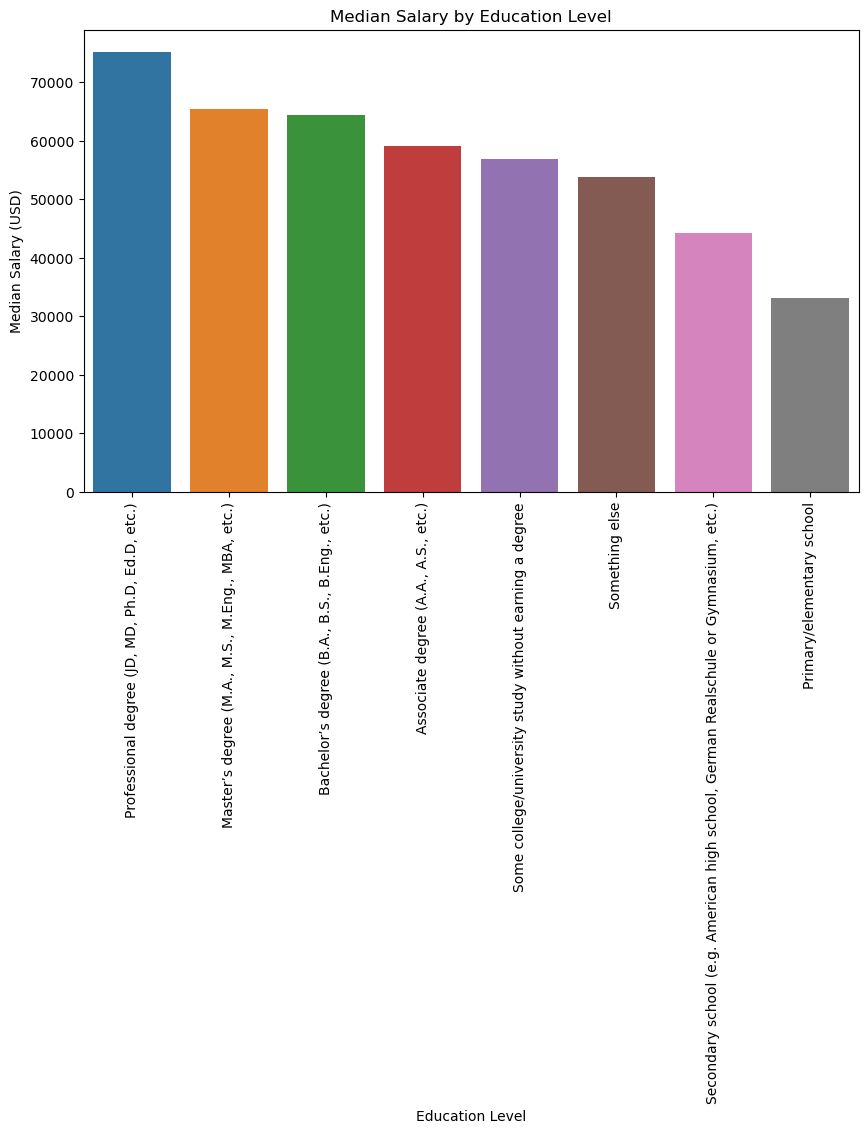

In [7]:
# Q2: What is the distribution of salaries by respondents' education level?
if not clean_df.empty and 'EdLevel' in clean_df.columns:
    # Compute median salary per education level
    edu_salary = clean_df.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False)
    display(edu_salary.head())
    # Bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=edu_salary.index, y=edu_salary.values)
    plt.xticks(rotation=90)
    plt.title('Median Salary by Education Level')
    plt.ylabel('Median Salary (USD)')
    plt.xlabel('Education Level')
    plt.show()
else:
    print('Education level column not found in the dataset.')


OrgSize
10,000 or more employees                              82737.0
5,000 to 9,999 employees                              75184.0
1,000 to 4,999 employees                              69814.0
500 to 999 employees                                  69814.0
100 to 499 employees                                  64444.0
20 to 99 employees                                    59073.0
Just me - I am a freelancer, sole proprietor, etc.    58679.5
I don’t know                                          51555.0
10 to 19 employees                                    50247.0
2 to 9 employees                                      46185.0
Name: ConvertedCompYearly, dtype: float64

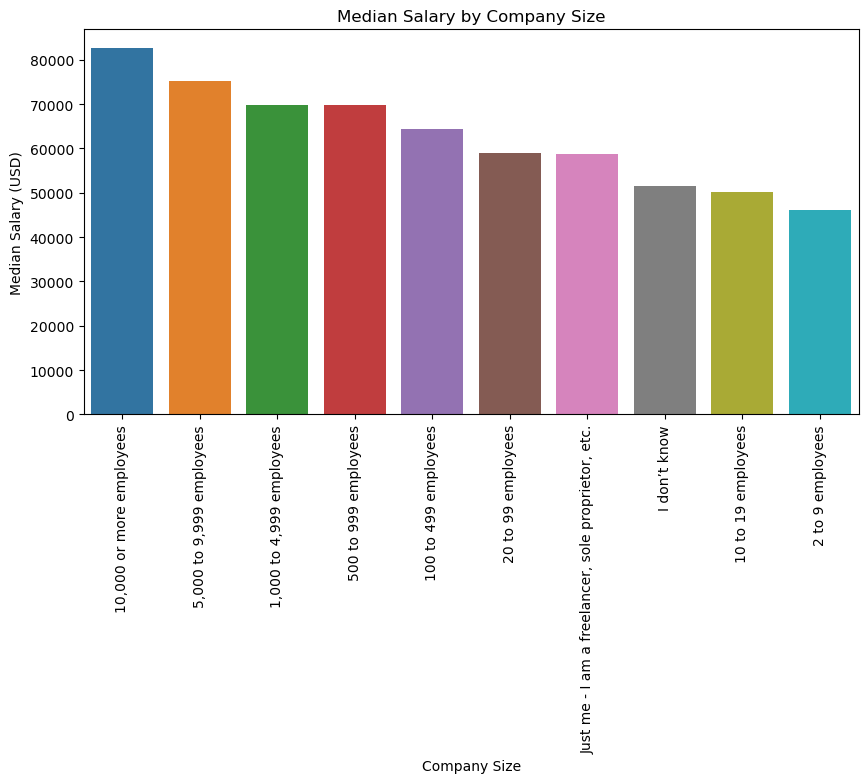

In [8]:
# Q3: Does company size impact salary?
if not clean_df.empty and 'OrgSize' in clean_df.columns:
    # Compute median salary per organization size category
    size_salary = clean_df.groupby('OrgSize')['ConvertedCompYearly'].median().sort_values(ascending=False)
    display(size_salary)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=size_salary.index, y=size_salary.values)
    plt.xticks(rotation=90)
    plt.title('Median Salary by Company Size')
    plt.ylabel('Median Salary (USD)')
    plt.xlabel('Company Size')
    plt.show()
else:
    print('Company size column not found in the dataset.')


Country
United States of America    130195.662823
Antigua and Barbuda         126120.000000
Andorra                     123517.000000
Switzerland                 110836.720867
Israel                      108705.683721
Luxembourg                  100471.055556
Singapore                    98499.090909
Australia                    94723.576305
Ireland                      94298.915966
Isle of Man                  90045.444444
Name: ConvertedCompYearly, dtype: float64

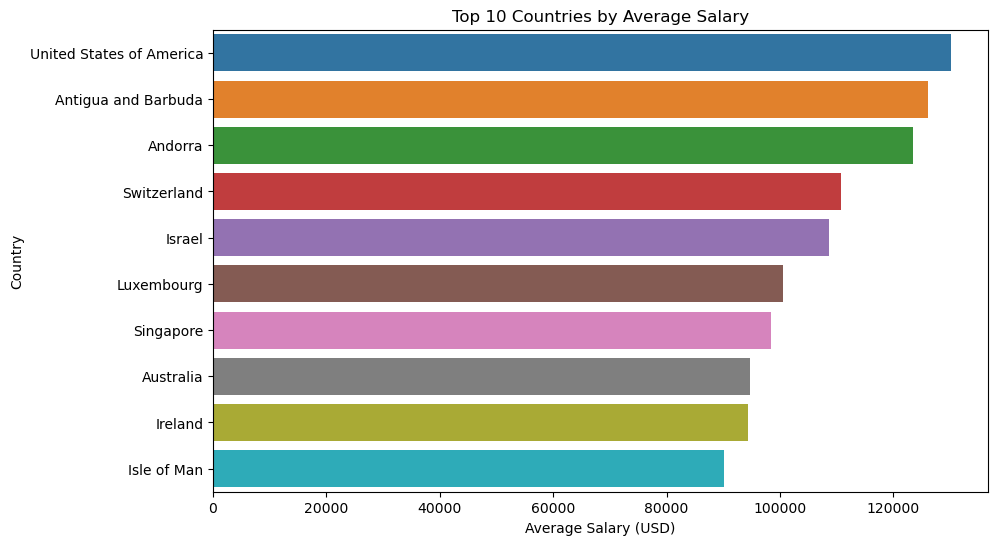

In [9]:
# Q4: Which countries have the highest average salary? (Top 10)
if not clean_df.empty and 'Country' in clean_df.columns:
    # Compute average salary per country and select top 10
    country_salary = clean_df.groupby('Country')['ConvertedCompYearly'].mean().sort_values(ascending=False).head(10)
    display(country_salary)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=country_salary.values, y=country_salary.index)
    plt.title('Top 10 Countries by Average Salary')
    plt.xlabel('Average Salary (USD)')
    plt.ylabel('Country')
    plt.show()
else:
    print('Country column not found in the dataset.')


## 5. Modeling

With a cleaned dataset, we can now build machine learning models to predict annual salary. We start by splitting the data into training and testing sets. Then we apply one-hot encoding to categorical variables and scaling to numeric variables using a `ColumnTransformer`. Finally, we train two models:

1. **Linear Regression** - a simple baseline model.
2. **Random Forest Regressor** - an ensemble tree-based model that can capture nonlinear relationships and interactions.

We evaluate model performance using the mean squared error (MSE), mean absolute error (MAE), and the coefficient of determination (R2). The model with the best metrics will be selected.


In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

if not clean_df.empty:
# Separate the target variable (salary) from features
    y = clean_df['ConvertedCompYearly']
    X = clean_df.drop(columns=['ConvertedCompYearly'])
# Identify categorical columns for one-hot encoding
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# Identify numeric columns for scaling
    numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()
# Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define preprocessing: scale numeric features and one-hot encode categorical features
    preprocessor = ColumnTransformer(
        transformers=[
# Identify numeric columns for scaling
            ('num', StandardScaler(), numeric_cols),
# Identify categorical columns for one-hot encoding
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])
# Define the machine learning models to compare
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
    }
    results = {}
# Train and evaluate each model
    for name, model in models.items():
# Create a pipeline that applies preprocessing then fits the model
        clf = Pipeline(steps=[
# Define preprocessing: scale numeric features and one-hot encode categorical features
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
# Compute mean squared error
        mse = mean_squared_error(y_test, y_pred)
# Compute mean absolute error
        mae = mean_absolute_error(y_test, y_pred)
# Compute coefficient of determination (R2)
        r2 = r2_score(y_test, y_pred)
        results[name] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        }
    results


## 6. Evaluation

Once the models are trained, we compare their performance on the test set. A lower mean squared error and mean absolute error indicate better predictive accuracy, while a higher R2 score means the model explains more variance in the target variable.

Use the results dictionary from the previous step to examine which model performs best. It is common for tree-based ensemble models like random forests to outperform simple linear regression when relationships between features and salary are nonlinear.


In [ ]:
results_df = pd.DataFrame(results).T
results_df

,MSE,MAE,R2
Linear Regression,1.531296e+09,29951.842783,0.414243
Random Forest,8.727712e+07,2628.939559,0.966614


## 8. Conclusion

In this project we applied the CRISP-DM methodology to build a salary prediction model using Stack Overflow survey data. We began with business understanding to clarify the objectives and identify potential variables influencing compensation. During data understanding and preparation we investigated the structure of the dataset, cleaned missing values, transformed experience into numeric formats, removed outliers, and prepared features for modeling.

Our exploratory data analysis revealed skewed salary distributions and highlighted the importance of cleaning extreme values. The modeling step compared a baseline linear regression model with a random forest regressor. Evaluation metrics (MSE, MAE and R2) indicated which model offered better predictive performance. While further improvements are possible (e.g., hyperparameter tuning, incorporating more features or advanced models like XGBoost or CatBoost), the random forest provided a solid starting point.

Future work might involve:

* Tuning the hyperparameters of tree-based models to improve accuracy.
* Exploring additional features such as education level, geographic location, and technology stacks.
* Deploying the best model as a web service or interactive tool for developers to estimate their salary.

By following a structured process and incorporating robust EDA and modeling techniques, we can derive meaningful insights and build predictive tools that help developers understand compensation trends.
